# WS 1.7: Modelling Uncertain Concrete Strength

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.7. Due: October 16, 2024.*

Assessing the uncertainties in the compressive strength of the produced concrete is key for the safety of infrastructures and buildings. However, a lot of boundary conditions influence the final resistance of the concrete, such the cement content, the environmental temperature or the age of the concrete. Probabilistic tools can be applied to model this uncertainty. In this workshop, you will work with a dataset of observations of the compressive strength of concrete (you can read more about the dataset [here](https://www.kaggle.com/datasets/gauravduttakiit/compressive-strength-of-concrete)). 

**The goal of this project is:**
1. Choose a reasonable distribution function for the concrete compressive strength analyzing the statistics of the observations.
2. Fit the chosen distributions by moments.
3. Assess the fit computing probabilities analytically.
4. Assess the fit using goodness of fit techniques and computer code.

The project will be divided into 3 parts: 1) data analysis, 2) pen and paper stuff (math practice!), and 3) programming.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats 
from math import ceil, trunc

plt.rcParams.update({'font.size': 14})

## Part 1: Explore the data

First step in the analysis is exploring the data, visually and through its statistics.

(array([180., 515., 560., 710., 690., 415., 390., 190., 135.,  75.]),
 array([ 2.33180783, 10.35854953, 18.38529123, 26.41203292, 34.43877462,
        42.46551632, 50.49225801, 58.51899971, 66.54574141, 74.5724831 ,
        82.5992248 ]),
 <BarContainer object of 10 artists>)

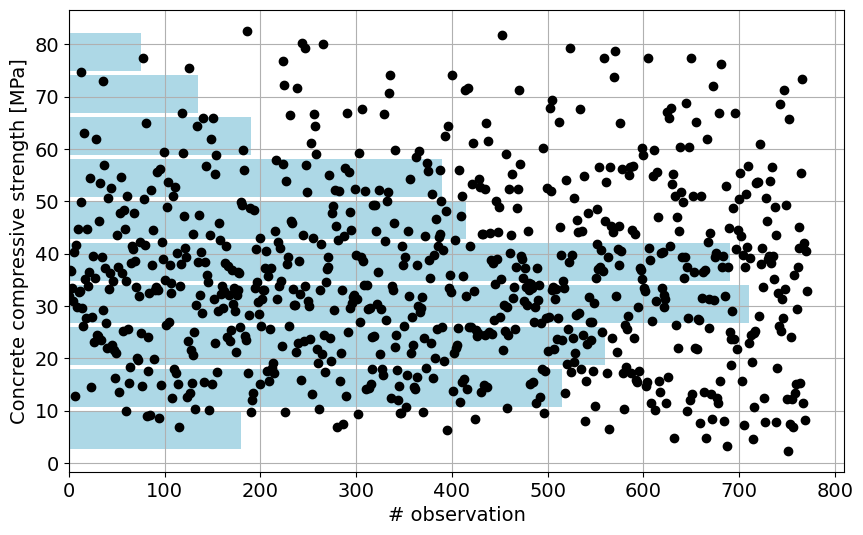

In [21]:
# Import
data = np.genfromtxt('dataset_concrete.csv', delimiter=",", skip_header=True)

# Clean
data = data[~np.isnan(data)]

# plot time series
plt.figure(figsize=(10, 6))
plt.plot(data,'ok')
plt.xlabel('# observation')
plt.ylabel('Concrete compressive strength [MPa]')
plt.grid()

weights = 5*np.ones(len(data))
plt.hist(data, orientation='horizontal', weights=weights, color='lightblue', rwidth=0.9)

In the figure above, you can see all the observations of concrete compressive strength. You can see that there is no clear pattern in the observations. Let's see how the statistics look like!

In [22]:
# Statistics

df_describe = pd.DataFrame(data)
df_describe.describe()

,0
count,772.000000
mean,35.724196
std,16.797389
min,2.331808
25%,23.677591
50%,33.870853
75%,46.232813
max,82.599225


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
    Using <b>ONLY</b> the statistics calculated in the previous lines:
    <li>Choose an appropriate distribution to model the data between the following: (1) Gumbel, (2) Uniform, and (3) Gaussian. </li>
    <li>Justiy your choice.</li>
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<b>Solution:</b>

- Gumbel.
- Uniform and Gaussian distributions are symmetric so they are not appropriate to model the observations. We can see it by computing the difference between the minimum value and the P50% and between the maximum value and P50%. $d_{min, 50}= 33.87-2.33 = 31.54 < d_{max, 50} = 82.60 - 33.87 = 48.72$.
</div>
</div>

## Part 2: Use pen and paper!

Once you have selected the appropriate distribution, you are going to fit it by moments manually and check the fit by computing some probabilities analytically. Remember that you have all the information you need in the textbook. Do not use any computer code for this section, you have to do in with pen and paper. You can use the notebook as a calculator.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
Fit the selected distribution by moments.
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>
    Fitting by moments a distribution implies equating the moments of the observations to those of the parametric distribution. Applying then the expressions of the mean and variance of the Gumbel distribution we obtain:
    
$
    \mathbb{V}ar(X) = \cfrac{\pi^2}{6} \beta^2 \to \beta = \sqrt{\cfrac{6\mathbb{V}ar(X)}{\pi^2}}=\sqrt{\cfrac{6 \cdot 16.797^2}{\pi^2}}= 13.097
$

$
    \mathbb{E}(X) = \mu + \lambda \beta \to \mu = \mathbb{E}(X) - \lambda \beta = 35.724 - 0.577 \cdot 13.097 = 28.167
    $
</div>
</div>

We can now check the fit by computing manually some probabilities from the fitted distribution and comparing them with the empirical ones.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   
Check the fit of the distribution:
    <li>Use the values obtained from the statistical inspection: the min, 25%, 50%, 75% and max values. What are the non-exceedance probabilities (from the empirical distribution) that correspond to those values?</li>
    <li>Compute the values of the random variable corresponding to those probabilities using the fitted distribution.</li>
    <li>Compare the obtained values with the empirical ones and assess the fit.</li>
</p>
You can summarize you answers in the following table (report your values with 3-4 significant digits max, as needed).
</div>


|   |Minimum value|P25%|P50%|P75%|Maximum value|
|---|-------------|----|----|----|-------------|
|Non-exceedance probability [$-$]| | 0.25 | 0.50 | 0.75 |  |
|Empirical quantiles [MPa] | | | | | |
|Predicted quantiles [MPa] ||||||

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>
    
|   |Minimum value|P25%|P50%|P75%|Maximum value|
|---|-------------|----|----|----|-------------|
|Non-exceedance probability [$-$]| 1/(772+1)| 0.25 | 0.5 | 0.75 | 772/(772+1) |
|Empirical quantiles [MPa] |2.332|23.678|33.871|46.232|82.599|
|Predicted quantiles [MPa] |3.353|23.889|32.967|44.485|115.257|

Note: you can compute the values of the random variable using the inverse of the CDF of the Gumbel distribution:
     
$
F(x) = e^{\normalsize -e^{\normalsize-\cfrac{x-\mu}{\beta}}} \to x = -\beta \ln\left(-\ln F\left(x\right)\right) + \mu
$

Compare and assess:

The values close to the central moments (P25%, P50% and P75%) are well fitted. Regarding the left tail, the fit is reasonable, since the predicted value for the minimum observation is the same order of magnitude although not accurate. Finally, the right tail is not properly fitted since the estimation for the maximum observation is far from the actual value.   
    
    
</div>
</div>

## Part 3: Let's do it with Python!

Now, let's assess the performance using further goodness of fit metrics and see whether they are consistent with the previously done analysis.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
Prepare a function to compute the empirical cumulative distribution function.
</p>
</div>

In [23]:
# def ecdf(YOUR_CODE_HERE):
#     YOUR_CODE_HERE # may be more than one line
#     return YOUR_CODE_HERE

# SOLUTION:
def ecdf(observations):
    x = np.sort(observations)
    n = x.size
    y = np.arange(1, n+1) / n
    return [y, x]

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
Transform the fitted parameters for the selected distribution to loc-scale-shape.
</p>
</div>

Hint: the distributions are in our online textbook, but it is also critical to make sure that the formulation in the book is identical to that of the Python package we are using. You can do this by finding the page of the relevant distribution in the [Scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) documentation.

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>
    The Gumbel distribution is already parameterized in terms of loc-scale-shape. You don't need to do anything!
</div>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>   
Assess the goodness of fit of the fitted distribution by:
    <li> Comparing the empirical and fitted PDF.</li>
    <li> Using the exceedance plot in log-scale.</li>
    <li> Using the QQplot.</li>
    <li> Interpret them. Do you reach a conclusion similar to that in the previous section?</li>
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) built in functions (watch out with the parameters definition!).

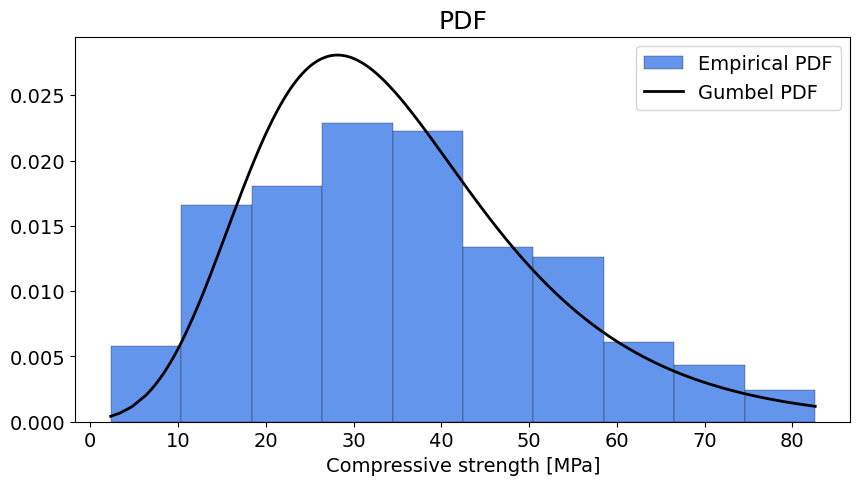

In [24]:
# loc = YOUR_CODE_HERE
# scale = YOUR_CODE_HERE

# fig, axes = plt.subplots(1, 1, figsize=(10, 5))
# axes.hist(YOUR_CODE_HERE,
#           edgecolor='k', linewidth=0.2, color='cornflowerblue',
#           label='Empirical PDF', density = True)
# axes.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           'k', linewidth=2, label='YOUR_DISTRIBUTION_NAME_HERE PDF')
# axes.set_xlabel('Compressive strength [MPa]')
# axes.set_title('PDF', fontsize=18)
# axes.legend()

# SOLUTION
loc = 28.167
scale = 13.097

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.hist(data,
          edgecolor='k', linewidth=0.2, color='cornflowerblue',
          label='Empirical PDF', density = True)
axes.plot(np.sort(data), stats.gumbel_r.pdf(np.sort(data), loc, scale),
          'k', linewidth=2, label='Gumbel PDF')
axes.set_xlabel('Compressive strength [MPa]')
axes.set_title('PDF', fontsize=18)
axes.legend()
fig.savefig('pdf.svg')

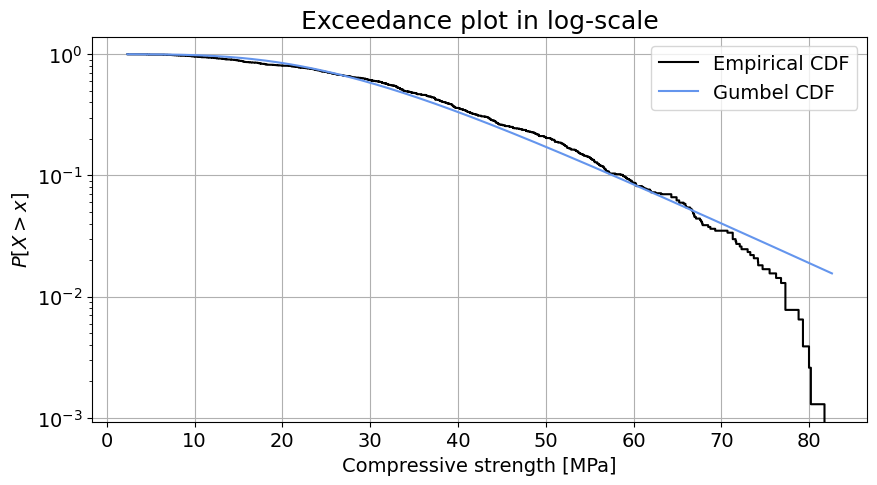

In [25]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Empirical CDF')
# axes.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='cornflowerblue', label='YOUR_DISTRIBUTION_NAME_HERE CDF')
# axes.set_xlabel('Compressive strength [MPa]')
# axes.set_ylabel('${P[X > x]}$')
# axes.set_title('Exceedance plot in log-scale', fontsize=18)
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.step(ecdf(data)[1], 1-ecdf(data)[0], 
          color='k', label='Empirical CDF')
axes.plot(ecdf(data)[1], 1-stats.gumbel_r.cdf(ecdf(data)[1], loc, scale),
          color='cornflowerblue', label='Gumbel CDF')
axes.set_xlabel('Compressive strength [MPa]')
axes.set_ylabel('${P[X > x]}$')
axes.set_title('Exceedance plot in log-scale', fontsize=18)
axes.set_yscale('log')
axes.legend()
axes.grid()
fig.savefig('cdf.svg')

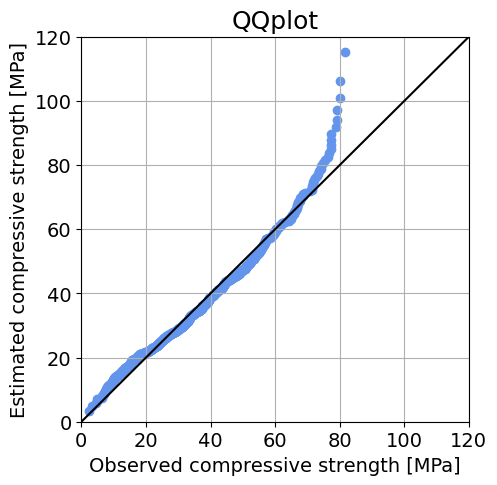

In [26]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 5))

# axes.plot([0, 120], [0, 120], 'k')
# axes.scatter(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#              color='cornflowerblue', label='Gumbel')
# axes.set_xlabel('Observed compressive strength [MPa]')
# axes.set_ylabel('Estimated compressive strength [MPa]')
# axes.set_title('QQplot', fontsize=18)
# axes.set_xlim([0, 120])
# axes.set_ylim([0, 120])
# axes.set_xticks(np.arange(0, 121, 20))
# axes.grid()

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

axes.plot([0, 120], [0, 120], 'k')
axes.scatter(ecdf(data)[1], stats.gumbel_r.ppf(ecdf(data)[0], loc, scale), 
             color='cornflowerblue', label='Gumbel')
axes.set_xlabel('Observed compressive strength [MPa]')
axes.set_ylabel('Estimated compressive strength [MPa]')
axes.set_title('QQplot', fontsize=18)
axes.set_xlim([0, 120])
axes.set_ylim([0, 120])
axes.set_xticks(np.arange(0, 121, 20))
axes.grid()
fig.savefig('ppf.svg')

_Your answer here._

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>
    <li> Comparing the PDF: The fitted distribution approximately follows the bell shape of the observations with a right tale, so Gumbel distribution seems an appropriate choice considering the shape of the PDF. </li>
    <li> Logscale plot: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. We can see that actually the tail of the empirical distribution is not well fitted. Gumbel distribution provides estimates of the random variable higher than the actual values, being on the safe side in this case. We would need to reflect whether this values are reasonable and have a physical meaning. </li>
    <li> QQplot: Again, we can see that the distribution performs well around the central moments and left tail, but the right tail is not properly fitted.</li>
    
The conclusions reached with this analysis are similar to those obtained in the analytical part (pen and paper), since the techniques are equivalent. We can make use of the computer power to obtain more robust conclusions.
</div>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.